In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns

# tools for project
import os,glob
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
# Get data file names
path = "Data/Chicago/"
filenames = glob.glob(path + "/*.csv")

In [3]:
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [4]:
# Concatenate all data into one DataFrame
crime = pd.concat(dfs, ignore_index=True)

In [5]:
# check the data loaded
crime.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958
1,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
2,11650953,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2411,24.0,50.0,42.006421,-87.681538
3,11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374
4,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1834,18.0,42.0,41.892659,-87.616600


In [6]:
##check nulls before coercing errors
crime.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10364
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 86787
Longitude                86787
dtype: int64

In [7]:
## Using errors = "coerce"
crime["Date_coerce"] = pd.to_datetime(crime["Date"], errors='coerce')
crime["Date_coerce"]

0         2019-01-01 13:00:00
1         2019-01-01 01:00:00
2         2019-01-01 13:00:00
3         2019-01-01 01:00:00
4         2019-01-01 01:00:00
                  ...        
7783197   2003-12-31 12:50:12
7783198   2003-12-31 12:55:00
7783199   2003-12-31 00:55:00
7783200   2003-12-31 00:57:00
7783201   2003-12-31 12:59:10
Name: Date_coerce, Length: 7783202, dtype: datetime64[ns]

In [8]:
## How many null values did we create?
crime.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10364
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 86787
Longitude                86787
Date_coerce                  0
dtype: int64

In [9]:
## use the fixed-datetime column to make the datetime col
crime['Datetime'] = pd.to_datetime(crime["Date"])
crime

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_coerce,Datetime
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,2019-01-01 13:00:00,2019-01-01 13:00:00
1,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,2019-01-01 01:00:00,2019-01-01 01:00:00
2,11650953,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2411,24.0,50.0,42.006421,-87.681538,2019-01-01 13:00:00,2019-01-01 13:00:00
3,11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,2019-01-01 01:00:00,2019-01-01 01:00:00
4,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1834,18.0,42.0,41.892659,-87.616600,2019-01-01 01:00:00,2019-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783197,3116762,12/31/2003 12:50:12 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003,2003-12-31 12:50:12,2003-12-31 12:50:12
7783198,3121312,12/31/2003 12:55:00 PM,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319,2003-12-31 12:55:00,2003-12-31 12:55:00
7783199,3112374,12/31/2003 12:55:00 AM,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656,2003-12-31 00:55:00,2003-12-31 00:55:00
7783200,3126768,12/31/2003 12:57:00 AM,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,True,False,726,7.0,15.0,41.777134,-87.669035,2003-12-31 00:57:00,2003-12-31 00:57:00


In [10]:
#check the dataframe info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783202 entries, 0 to 7783201
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Date_coerce           datetime64[ns]
 13  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 727.4+ MB


In [11]:
## Drop extra columns not needed
drop_cols = ['Date', 'Date_coerce','Longitude','Latitude','ID','Ward']
df = crime.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783202 entries, 0 to 7783201
Data columns (total 8 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Primary Type          object        
 1   Description           object        
 2   Location Description  object        
 3   Arrest                bool          
 4   Domestic              bool          
 5   Beat                  int64         
 6   District              float64       
 7   Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 371.1+ MB


In [12]:
df.isna().sum()

Primary Type                0
Description                 0
Location Description    10364
Arrest                      0
Domestic                    0
Beat                        0
District                   47
Datetime                    0
dtype: int64

In [13]:
df.dropna(subset=['District'], inplace=True)
df.isna().sum()

Primary Type                0
Description                 0
Location Description    10364
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Datetime                    0
dtype: int64

In [14]:
## feature engineering for dates
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()
df['Day of Month'] = df['Datetime'].dt.day
df['Day of Week'] = df['Datetime'].dt.day_name()
df['Hour'] = df['Datetime'].dt.hour
df['Month']=df['Datetime'].dt.month
df

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Datetime,Year,Month,Day of Month,Day of Week,Hour
0,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,2019-01-01 13:00:00,2019,1,1,Tuesday,13
1,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,2019-01-01 01:00:00,2019,1,1,Tuesday,1
2,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2411,24.0,2019-01-01 13:00:00,2019,1,1,Tuesday,13
3,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,2019-01-01 01:00:00,2019,1,1,Tuesday,1
4,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1834,18.0,2019-01-01 01:00:00,2019,1,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783197,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,2003-12-31 12:50:12,2003,12,31,Wednesday,12
7783198,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,2003-12-31 12:55:00,2003,12,31,Wednesday,12
7783199,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,2003-12-31 00:55:00,2003,12,31,Wednesday,0
7783200,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,True,False,726,7.0,2003-12-31 00:57:00,2003,12,31,Wednesday,0


In [15]:
# make index
df = df.set_index('Datetime')
df

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Month,Day of Month,Day of Week,Hour
Datetime,,,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,2019,1,1,Tuesday,13
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,2019,1,1,Tuesday,1
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2411,24.0,2019,1,1,Tuesday,13
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,2019,1,1,Tuesday,1
2019-01-01 01:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1834,18.0,2019,1,1,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,2003,12,31,Wednesday,12
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,2003,12,31,Wednesday,12
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,2003,12,31,Wednesday,0


### Q1: Which district has the most crimes? Which has the least?

In [16]:
#use districts to get value counts
df['District'].value_counts()

8.0     523091
11.0    499727
6.0     455036
7.0     450369
25.0    442806
4.0     441912
3.0     394760
12.0    385596
9.0     380294
2.0     368293
18.0    349246
19.0    349238
5.0     344958
10.0    335333
15.0    333708
1.0     314505
14.0    301230
16.0    260419
22.0    255118
24.0    235026
17.0    224664
20.0    137588
31.0       234
21.0         4
Name: District, dtype: int64

- District 8 has the most crimes.
- District 21 has the least crimes.

### Q2: What months have the most crime? What months have the least?
  

In [17]:
## Resampling to Monthly data
ts = df.resample("M").size().loc['2001':]
ts

Datetime
2001-01-31    38120
2001-02-28    33785
2001-03-31    40566
2001-04-30    40090
2001-05-31    41836
              ...  
2022-12-31    19751
2023-01-31    20801
2023-02-28    18136
2023-03-31    20159
2023-04-30    12633
Freq: M, Length: 268, dtype: int64

In [18]:
## resample to correct freq
ts = df.resample("M").size()

In [19]:
#create variable
date_most_crimes = ts.idxmax()
date_most_crimes

Timestamp('2002-07-31 00:00:00', freq='M')

In [20]:
ts.loc[date_most_crimes]

46013

In [21]:
# Which Months have  the highest crime and lowest crime
df['Month'].value_counts()

7     717114
8     710285
5     682817
6     681639
10    676098
9     668080
3     649756
4     639701
1     621859
11    608805
12    579559
2     547442
Name: Month, dtype: int64

- July has the most crimes.
- February has the least crimes.

### Q3: Are there any individual crimes that do not follow this pattern? If so, which crimes?


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7783155 entries, 2019-01-01 13:00:00 to 2003-12-31 12:59:10
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Primary Type          object 
 1   Description           object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
 7   Year                  int64  
 8   Month                 int64  
 9   Day of Month          int64  
 10  Day of Week           object 
 11  Hour                  int64  
dtypes: bool(2), float64(1), int64(5), object(4)
memory usage: 668.0+ MB


In [36]:
# look at all the types of crimes
df['Primary Type'].value_counts()

THEFT                                1641808
BATTERY                              1422674
CRIMINAL DAMAGE                       887095
NARCOTICS                             747597
ASSAULT                               507176
OTHER OFFENSE                         483557
BURGLARY                              424358
MOTOR VEHICLE THEFT                   375354
DECEPTIVE PRACTICE                    344801
ROBBERY                               292274
CRIMINAL TRESPASS                     214286
WEAPONS VIOLATION                     106378
PROSTITUTION                           69839
OFFENSE INVOLVING CHILDREN             55710
PUBLIC PEACE VIOLATION                 52315
SEX OFFENSE                            30666
CRIM SEXUAL ASSAULT                    27630
INTERFERENCE WITH PUBLIC OFFICER       18389
LIQUOR LAW VIOLATION                   14900
GAMBLING                               14618
ARSON                                  13246
HOMICIDE                               12545
KIDNAPPING

In [37]:
# find the individual crimes by month
crime_month= df.groupby("Primary Type")['Month'].value_counts().sort_index()
crime_month

Primary Type       Month
ARSON              1         963
                   2         840
                   3        1136
                   4        1119
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9187
                   11       7951
                   12       7400
Name: Month, Length: 415, dtype: int64

In [38]:
crime_month_pattern =crime_month.to_frame("Number of Crimes")
print(crime_month_pattern)

                         Number of Crimes
Primary Type      Month                  
ARSON             1                   963
                  2                   840
                  3                  1136
                  4                  1119
                  5                  1230
...                                   ...
WEAPONS VIOLATION 8                  9887
                  9                  9435
                  10                 9187
                  11                 7951
                  12                 7400

[415 rows x 1 columns]


In [45]:
plot_df = crime_month_pattern.reset_index()
plot_df

,Primary Type,Month,Number of Crimes
0,ARSON,1,963
1,ARSON,2,840
2,ARSON,3,1136
3,ARSON,4,1119
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9187
413,WEAPONS VIOLATION,11,7951


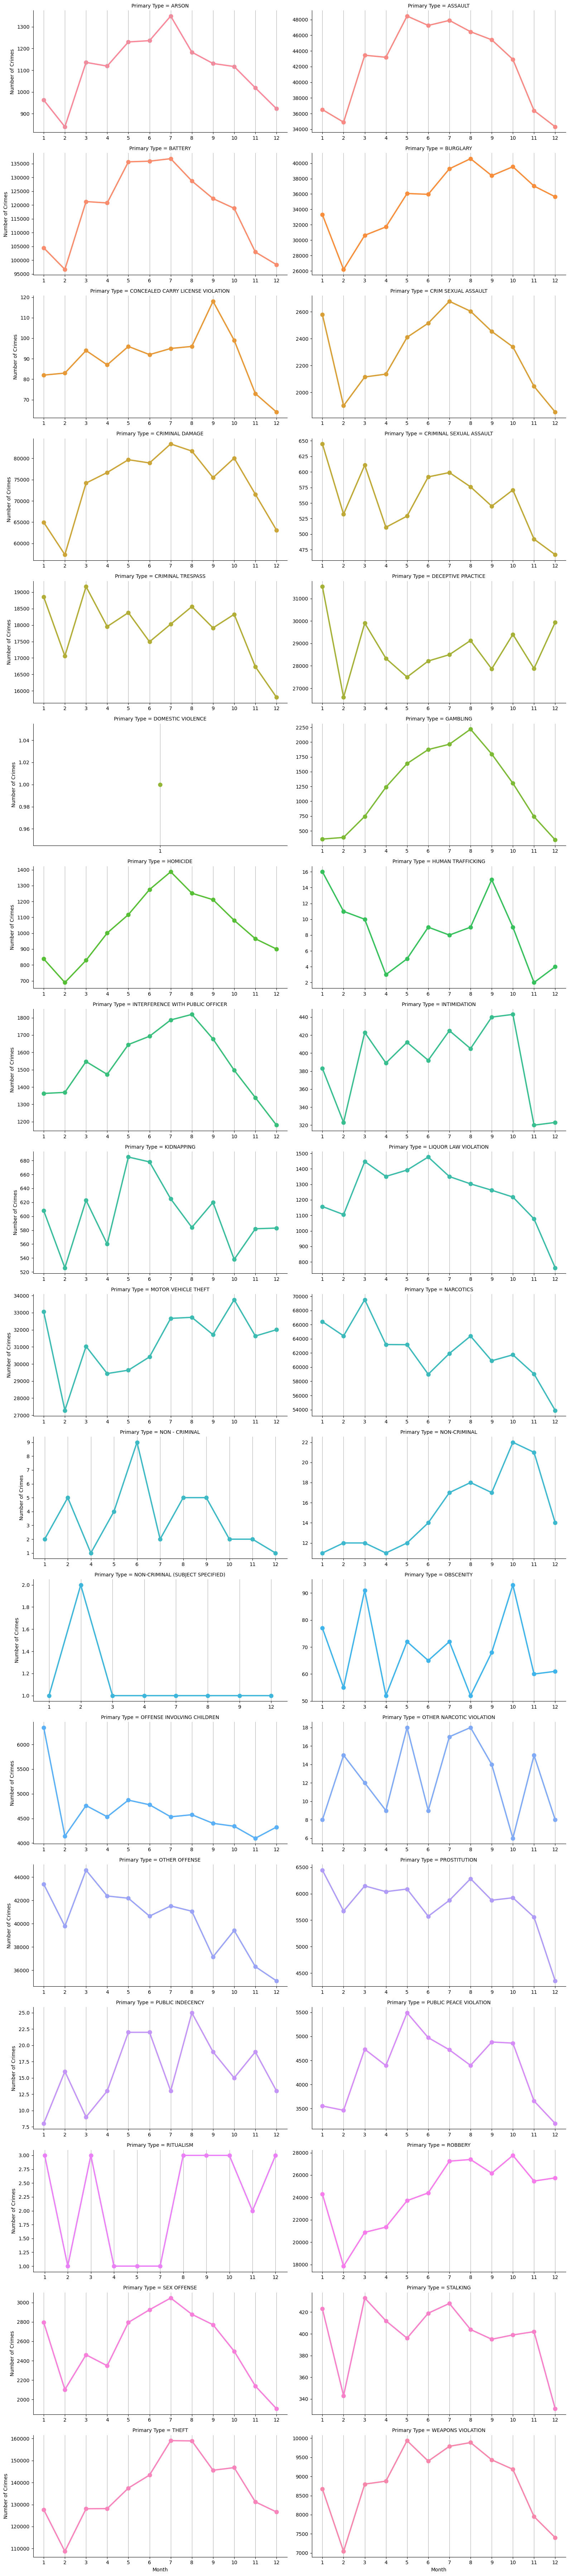

In [47]:
g = sns.catplot(data=plot_df, x='Month', y='Number of Crimes',
               kind="point",
                aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Q4: Are there any holidays that show an increase in the # of crimes? Are there any holidays that show a decrease in the # of crimes?


In [48]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7783155 entries, 2019-01-01 13:00:00 to 2003-12-31 12:59:10
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Primary Type          object 
 1   Description           object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
 7   Year                  int64  
 8   Month                 int64  
 9   Day of Month          int64  
 10  Day of Week           object 
 11  Hour                  int64  
dtypes: bool(2), float64(1), int64(5), object(4)
memory usage: 668.0+ MB


In [50]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [51]:
## Saving both holiday types as columns
crime["US Holiday"] = crime['Datetime'].map(us_holidays.get)
crime

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date_coerce,Datetime,US Holiday
0,12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,2019-01-01 13:00:00,2019-01-01 13:00:00,New Year's Day
1,11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,2019-01-01 01:00:00,2019-01-01 01:00:00,New Year's Day
2,11650953,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2411,24.0,50.0,42.006421,-87.681538,2019-01-01 13:00:00,2019-01-01 13:00:00,New Year's Day
3,11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,2019-01-01 01:00:00,2019-01-01 01:00:00,New Year's Day
4,11574022,01/01/2019 01:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,1834,18.0,42.0,41.892659,-87.616600,2019-01-01 01:00:00,2019-01-01 01:00:00,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783197,3116762,12/31/2003 12:50:12 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003,2003-12-31 12:50:12,2003-12-31 12:50:12,None
7783198,3121312,12/31/2003 12:55:00 PM,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319,2003-12-31 12:55:00,2003-12-31 12:55:00,None
7783199,3112374,12/31/2003 12:55:00 AM,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656,2003-12-31 00:55:00,2003-12-31 00:55:00,None
7783200,3126768,12/31/2003 12:57:00 AM,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,True,False,726,7.0,15.0,41.777134,-87.669035,2003-12-31 00:57:00,2003-12-31 00:57:00,None


In [52]:
crime['US Holiday'].value_counts()

New Year's Day                                     33525
Independence Day                                   22666
Labor Day                                          22156
Memorial Day                                       21123
Columbus Day                                       20915
Veterans Day                                       20416
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18224
Thanksgiving                                       14793
Christmas Day                                      12414
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5519
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

- New Year's Day has an increase in the number of crimes.
- Juneteeth National Independence Day (Observed) has a decrease in the number of crimes.